<a href="https://colab.research.google.com/github/jrad9921/Data-Analysis/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Import Data as df

In [3]:
df = pd.read_csv('/wine.csv')

In [5]:
df.shape

(1599, 12)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Check for missing values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Statitical Analysis

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data Visualization

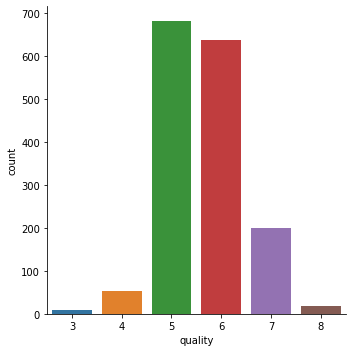

In [9]:
sns.catplot(x='quality', data=df, kind = 'count')

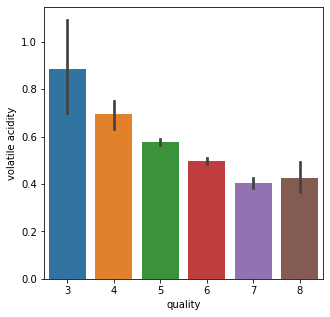

In [18]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='volatile acidity', data = df)

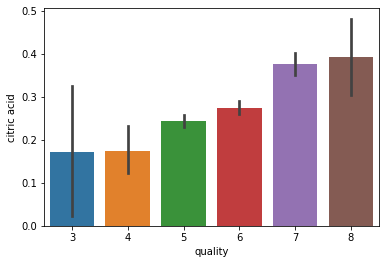

In [13]:
sns.barplot(x='quality', y='citric acid', data = df)

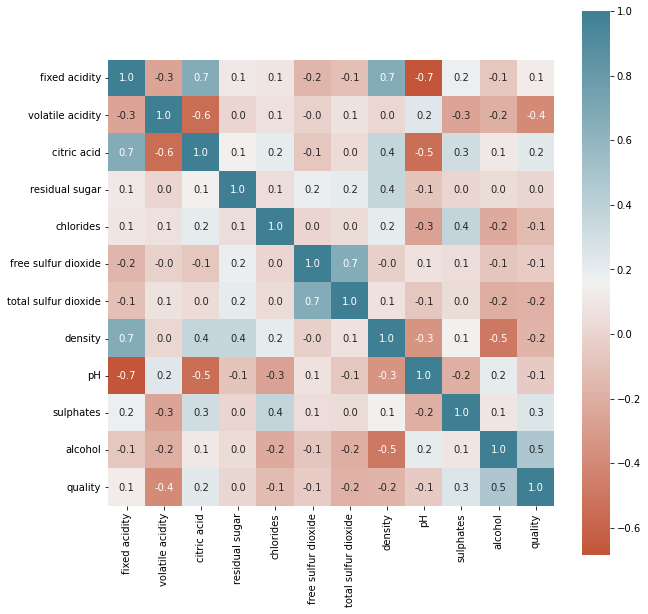

In [40]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square=True, annot=True, fmt='.1f', cmap=sns.diverging_palette(20,220,n=200))

Data Preprocessing

In [41]:
#Seperate the data and label
x = df.drop('quality', axis=1)

Label Binarization

0       Average
1       Average
2       Average
3       Average
4       Average
         ...   
1594    Average
1595    Average
1596    Average
1597    Average
1598    Average
Name: quality, Length: 1599, dtype: object


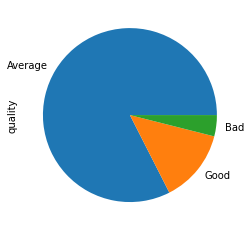

In [61]:
from numpy.ma.core import size
def condition(y):
  if y>=7:
    return "Good"
  elif y>=5 and y<7:
    return "Average"
  else:
    return "Bad"

y = df['quality'].apply(condition)
print(y)
y.value_counts().plot(kind='pie')

Train and Test Split

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 3)
print(x.shape, xtrain.shape, xtest.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training: Random Forest Classifier

In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

Model Evaluation: Accuracy Score

In [82]:
xtest_prediction = model.predict(xtest)
test_accuracy = accuracy_score(xtest_prediction, ytest)
print('Test Data Accuracy is: ', test_accuracy)

Test Data Accuracy is:  0.890625


Building a Predictive System

In [87]:
input_data = (6.0,0.33,0.32,12.9,0.054,6.0,113.0,0.99572,3.3,0.56,11.5)
input_df = np.asarray(input_data)
input_reshaped = input_df.reshape(1,-1)
prediction = model.predict(input_reshaped)
print('The Wine Quality is: ', prediction)

The Wine Quality is:  ['Bad']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
